# Отчёт по производительности для задания №8 (OpenMP)


In [1]:
import re
import pandas as pd
from pathlib import Path

# Читаем файл с логами нового задания
text = Path("../Results/8_log.txt").read_text(encoding="utf-8")
pd.set_option('display.max_rows', 150)

# Регулярки
size_re = re.compile(r"Size:\s*(\d+)\s*vectors of dimension (\d+)")
threads_re = re.compile(r"Threads:\s*(\d+)")
time_re = re.compile(r"Time:\s*([\d.]+)\s*ms\s*\(speedup:\s*([\d.]+)x,\s*efficiency:\s*([\d.]+)\)")

records = []
current_size = None
current_dim = None

lines = text.splitlines()
i = 0
while i < len(lines):
    line = lines[i].strip()

    m_size = size_re.search(line)
    if m_size:
        current_size = int(m_size.group(1))
        current_dim = int(m_size.group(2))
        i += 1
        continue

    m_threads = threads_re.search(line)
    if m_threads:
        threads = int(m_threads.group(1))
        i += 1
        if i < len(lines):
            m_time = time_re.search(lines[i].strip())
            if m_time:
                time_ms = float(m_time.group(1))
                speedup = float(m_time.group(2))
                efficiency = float(m_time.group(3))
                records.append({
                    'size': current_size,
                    'dim': current_dim,
                    'threads': threads,
                    'time_ms': time_ms,
                    'speedup': speedup,
                    'efficiency': efficiency
                })
        i += 1
        continue

    i += 1

df = pd.DataFrame(records)
print(f"Rows: {len(df)}")
df


Rows: 24


,size,dim,threads,time_ms,speedup,efficiency
0,500,100,1,14.0495,1.000000,1.000000
1,500,100,2,12.1303,1.158210,0.579105
2,500,100,4,12.2658,1.145420,0.286354
3,500,100,6,12.2412,1.147720,0.191287
4,500,100,8,12.1464,1.156680,0.144585
5,500,100,12,12.2249,1.149250,0.095771
6,1000,50,1,12.0692,1.000000,1.000000
7,1000,50,2,13.1899,0.915037,0.457518
8,1000,50,4,13.0852,0.922353,0.230588
9,1000,50,6,12.8746,0.937446,0.156241


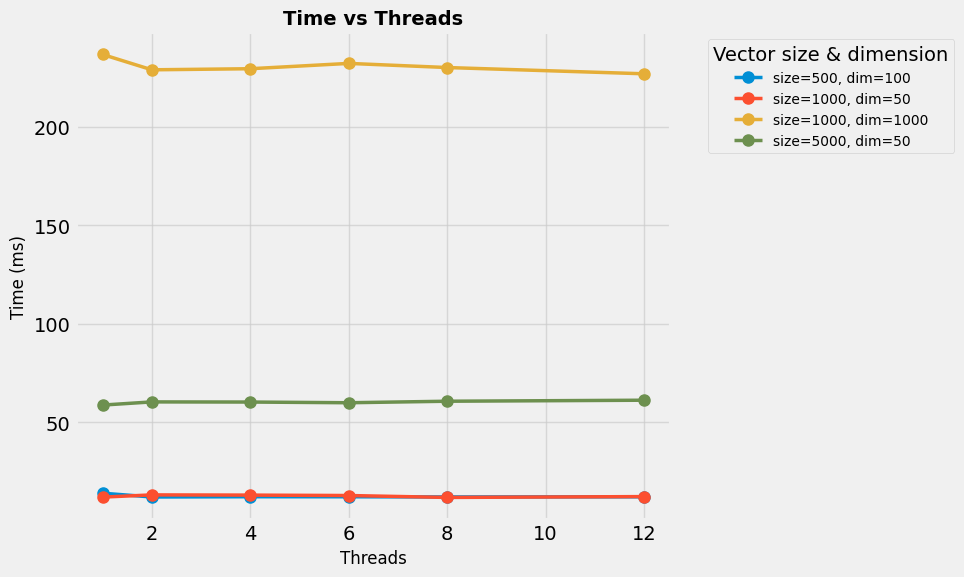

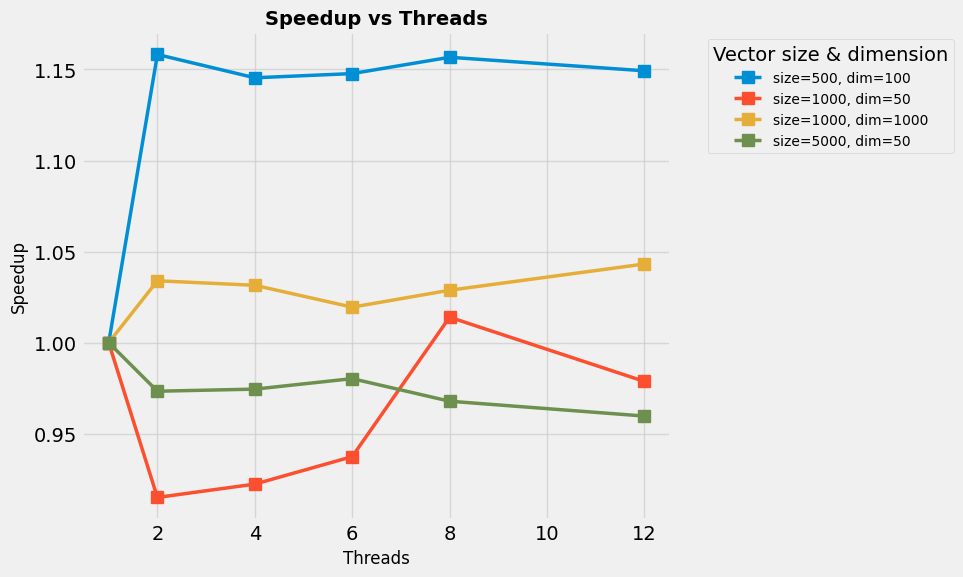

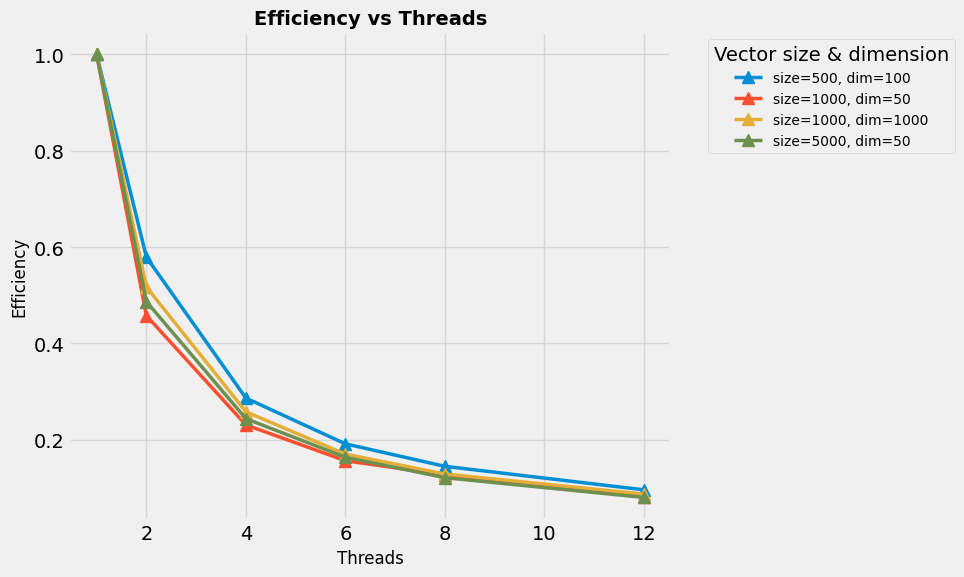

In [5]:
import matplotlib.pyplot as plt
import numpy as np

size_dim_pairs = sorted(df[['size','dim']].drop_duplicates().values.tolist())
plt.style.use('fivethirtyeight')

# 1) Time vs Threads
plt.figure(figsize=(10, 6))
for size, dim in size_dim_pairs:
    plot_data = df[(df['size']==size) & (df['dim']==dim)].sort_values('threads')
    plt.plot(plot_data['threads'], plot_data['time_ms'], 
             marker='o', linewidth=2.5, markersize=8,
             label=f'size={size}, dim={dim}')
plt.title('Time vs Threads', fontsize=14, fontweight='bold')
plt.xlabel('Threads', fontsize=12)
plt.ylabel('Time (ms)', fontsize=12)
plt.grid(True, alpha=0.7)
plt.legend(title='Vector size & dimension', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left',
           fontsize=10)
plt.tight_layout()
plt.show()

# 2) Speedup vs Threads
plt.figure(figsize=(10, 6))
for size, dim in size_dim_pairs:
    plot_data = df[(df['size']==size) & (df['dim']==dim)].sort_values('threads')
    plt.plot(plot_data['threads'], plot_data['speedup'], 
             marker='s', linewidth=2.5, markersize=8,
             label=f'size={size}, dim={dim}')
plt.title('Speedup vs Threads', fontsize=14, fontweight='bold')
plt.xlabel('Threads', fontsize=12)
plt.ylabel('Speedup', fontsize=12)
plt.grid(True, alpha=0.7)
plt.legend(title='Vector size & dimension', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left',
           fontsize=10)
plt.tight_layout()
plt.show()

# 3) Efficiency vs Threads
plt.figure(figsize=(10, 6))
for size, dim in size_dim_pairs:
    plot_data = df[(df['size']==size) & (df['dim']==dim)].sort_values('threads')
    plt.plot(plot_data['threads'], plot_data['efficiency'], 
             marker='^', linewidth=2.5, markersize=8,
             label=f'size={size}, dim={dim}')
plt.title('Efficiency vs Threads', fontsize=14, fontweight='bold')
plt.xlabel('Threads', fontsize=12)
plt.ylabel('Efficiency', fontsize=12)
plt.grid(True, alpha=0.7)
plt.legend(title='Vector size & dimension', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left',
           fontsize=10)
plt.tight_layout()
plt.show()